In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('./credit-a.csv',header = None)#header = none 一句使得没有表头的数据第一行也包括进数据集

In [8]:
data#数据中没有表头

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,1,1,11,1,1.25,1,1,0,1,0,260,0.0,1
649,1,22.67,0.750,0,0,0,0,2.00,1,0,2,0,0,200,394.0,1
650,1,25.25,13.500,1,1,13,7,2.00,1,0,1,0,0,200,1.0,1
651,0,17.92,0.205,0,0,12,0,0.04,1,1,0,1,0,280,750.0,1


In [10]:
data.iloc[:,-1].value_counts()#获取数据，以确定是否为二分类问题

 1    357
-1    296
Name: 15, dtype: int64

In [14]:
x = data. iloc[:, :-1]
y = data. iloc[:, -1].replace(-1,0)#将一换为零，便于计算

In [18]:
model = tf.keras.Sequential()

In [19]:
model.add(tf.keras.layers.Dense(4,input_shape=(15,),activation = 'relu'))
model.add(tf.keras.layers.Dense(4,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 64        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']#测量判断正确率
)

In [24]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 726us/step - loss: 5.2818 - acc: 0.4548
Epoch 2/100
21/21 [==============================] - 0s 743us/step - loss: 2.4499 - acc: 0.5038
Epoch 3/100
21/21 [==============================] - 0s 668us/step - loss: 1.3012 - acc: 0.6508
Epoch 4/100
21/21 [==============================] - 0s 652us/step - loss: 1.2068 - acc: 0.6462
Epoch 5/100
21/21 [==============================] - 0s 689us/step - loss: 1.1148 - acc: 0.6508
Epoch 6/100
21/21 [==============================] - 0s 753us/step - loss: 1.0515 - acc: 0.6478
Epoch 7/100
21/21 [==============================] - 0s 807us/step - loss: 1.0151 - acc: 0.6478
Epoch 8/100
21/21 [==============================] - 0s 798us/step - loss: 0.9899 - acc: 0.6478
Epoch 9/100
21/21 [==============================] - 0s 789us/step - loss: 0.9428 - acc: 0.6554
Epoch 10/100
21/21 [==============================] - 0s 774us/step - loss: 0.8804 - acc: 0.6585
Epoch 11/100
21/21 [===================

In [25]:
history.history.keys()

dict_keys(['loss', 'acc'])

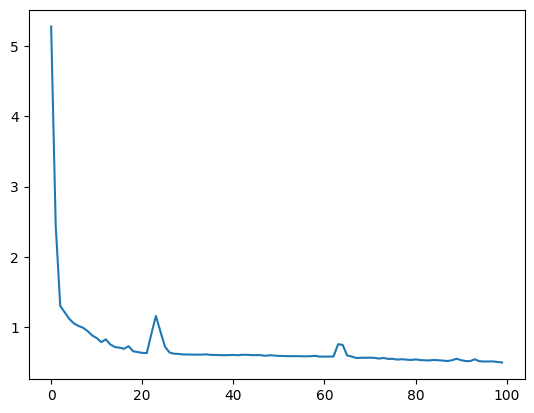

In [30]:
plt.plot(history.epoch,history.history.get('loss'))#history.epoch可替换为range(训练次数)

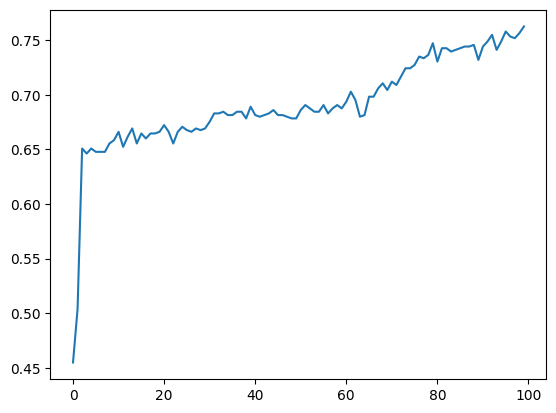

In [31]:
plt.plot(history.epoch,history.history.get('acc'))